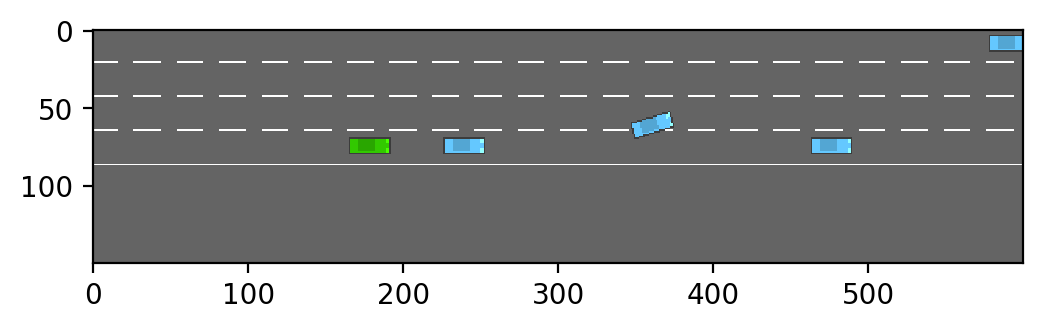

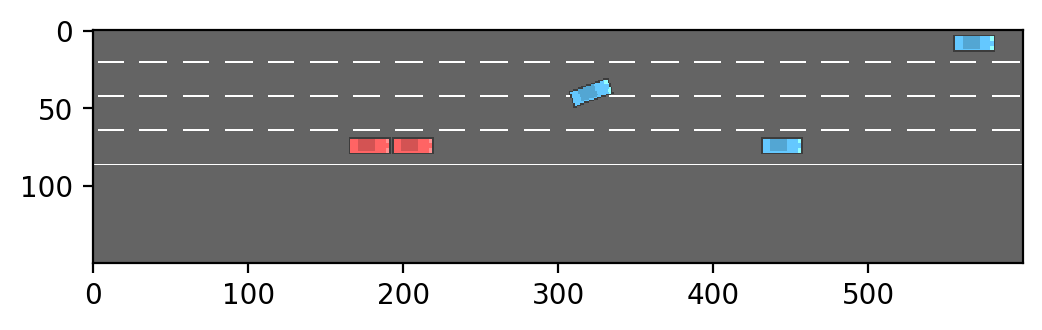

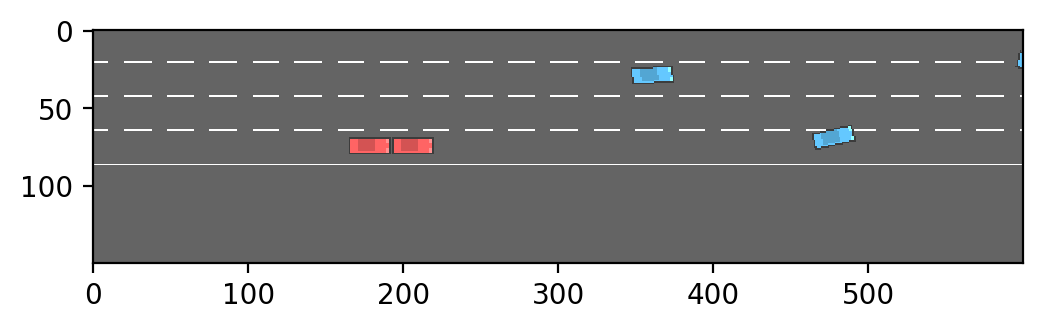

In [3]:
import os
# os.environ["SDL_VIDEODRIVER"] = "dummy"
os.environ["SDL_VIDEODRIVER"] = "fbcon"

import gym
import highway_env
from matplotlib import pyplot as plt

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

env = gym.make('highway-v0')
env.reset()
for _ in range(3):
    action = env.action_type.actions_indexes["IDLE"]
    obs, reward, done, info = env.step(action)
#     env.render(mode="rgb_array")
    plt.imshow(env.render(mode="rgb_array"))
    plt.show()

In [4]:
from rl_agents.trainer.evaluation import Evaluation
from rl_agents.agents.common.factory import load_agent, load_environment

%cd /h/sergio/tree-search-planning/rl-agents/scripts/
env_config = 'configs/IntersectionEnv/env.json'
agent_config = 'configs/IntersectionEnv/agents/DQNAgent/ego_attention_2h.json'
# env_config = '/h/sergio/tree-search-planning/rl-agents/scripts/configs/IntersectionEnv/env.json'
# agent_config = '/h/sergio/tree-search-planning/rl-agents/scripts/configs/IntersectionEnv/agents/DQNAgent/ego_attention_2h.json'
env = load_environment(env_config)
agent = load_agent(agent_config, env)
evaluation = Evaluation(env, agent, num_episodes=3000, display_env=False)
print(f"Ready to train {agent} on {env}")

/h/sergio/tree-search-planning/rl-agents/scripts
Ready to train <rl_agents.agents.deep_q_network.pytorch.DQNAgent object at 0x7f9397f61828> on <IntersectionEnv<intersection-v0>>


In [18]:
import gym
import highway_env

env = gym.make('highway-v0')
env.configure(
    {
        'observation': {
            'type': 'Kinematics',
            'vehicles_count': 5,
            'features': ['presence', 'x', 'y', 'vx', 'vy', 'cos_h', 'sin_h'],
            'normalized': False,
            'features_range': {
                'x': [-100, 100],
                'y': [-100, 100],
                'vx': [-20, 20],
                'vy': [-20, 20]
            },
            'absolute': False,
            'order': 'sorted',
        },
        'action': {'type': 'DiscreteMetaAction'},
        'simulation_frequency': 15,
        'policy_frequency': 1,
        'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
        'screen_width': 600,
        'screen_height': 150,
        'centering_position': [0.3, 0.5],
        'scaling': 5.5,
        'show_trajectories': False,
        'render_agent': True,
        'offscreen_rendering': False,
        'manual_control': False,
        'real_time_rendering': False,
        'lanes_count': 4,
        'controlled_vehicles': 1,
        'initial_lane_id': None,
        'duration': 40,
        'ego_spacing': 2,
        'vehicles_density': 1,
        'collision_reward': -1,
        'reward_speed_range': [20, 30],
        'offroad_terminal': False
    }
)
env.reset()

array([[ 1.        ,  1.        ,  0.04      ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.17793648, -0.04      , -0.53121002,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.3798584 , -0.04      , -0.45146982,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.56353557,  0.08      , -0.52781598,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.76329843, -0.04      , -0.4818915 ,  0.        ,
         1.        ,  0.        ]])

In [19]:
action = env.action_space.sample() # your agent here (this takes random actions)
observation, reward, done, info = env.step(action)

In [20]:
observation.shape

(5, 7)

In [7]:
observation.min()

-0.558346057203711

In [8]:
observation

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  1.        ,  0.        ,  0.        ,
          0.        ,  

In [12]:
env.config

{'observation': {'type': 'Kinematics'},
 'action': {'type': 'DiscreteMetaAction'},
 'simulation_frequency': 15,
 'policy_frequency': 1,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'screen_width': 600,
 'screen_height': 150,
 'centering_position': [0.3, 0.5],
 'scaling': 5.5,
 'show_trajectories': False,
 'render_agent': True,
 'offscreen_rendering': False,
 'manual_control': False,
 'real_time_rendering': False,
 'lanes_count': 4,
 'vehicles_count': 50,
 'controlled_vehicles': 1,
 'initial_lane_id': None,
 'duration': 40,
 'ego_spacing': 2,
 'vehicles_density': 1,
 'collision_reward': -1,
 'reward_speed_range': [20, 30],
 'offroad_terminal': False}